In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [93]:
df.drop_duplicates()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [94]:
#listing city values
unique_cities = df['City'].unique()
print(unique_cities)

['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'São Paulo' 'Saint Petersburg'
 'Salvador' 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang'
 'Singapore' 'Surabaya' 'Surat' 'Sydney' 'Taipei' 'Taiyuan' 'Tangshan'
 'Tianjin' 'Toky

In [95]:
#creating list of cities to be studied
target_cities = ['Tokyo', 'Melbourne', 'New York', 'Cape Town', 'Paris', 'Cairo', 'Santiago', 'Brasilia', 'Delhi', 'Ho Chi Minh City', 'Los Angeles']

In [96]:
#creating df of target cities
df2 = df[df['City'].isin(target_cities)]

In [97]:
df2

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
34810,1808-10-01,22.216,1.875,Cairo,Egypt,29.74N,31.38E
34811,1808-11-01,17.766,2.211,Cairo,Egypt,29.74N,31.38E
34812,1808-12-01,11.338,1.971,Cairo,Egypt,29.74N,31.38E
34813,1809-01-01,10.337,2.911,Cairo,Egypt,29.74N,31.38E
34814,1809-02-01,12.113,2.848,Cairo,Egypt,29.74N,31.38E
...,...,...,...,...,...,...,...
229685,2013-05-01,16.757,0.396,Tokyo,Japan,36.17N,139.23E
229686,2013-06-01,20.927,0.489,Tokyo,Japan,36.17N,139.23E
229687,2013-07-01,24.645,0.404,Tokyo,Japan,36.17N,139.23E
229688,2013-08-01,26.364,0.461,Tokyo,Japan,36.17N,139.23E


In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23673 entries, 34810 to 229689
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             23673 non-null  object 
 1   AverageTemperature             23027 non-null  float64
 2   AverageTemperatureUncertainty  23027 non-null  float64
 3   City                           23673 non-null  object 
 4   Country                        23673 non-null  object 
 5   Latitude                       23673 non-null  object 
 6   Longitude                      23673 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


In [99]:
df2['dt'] = pd.to_datetime(df2['dt'])

C:\Users\robby\AppData\Local\Temp/ipykernel_4072/45759493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['dt'] = pd.to_datetime(df2['dt'])


In [100]:
df2['Year'] = df2['dt'].dt.year

C:\Users\robby\AppData\Local\Temp/ipykernel_4072/3605359693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['dt'].dt.year


In [101]:
#checking NaN values
for cols in df2.columns:
    print(f"{cols}: {df2[cols].isna().sum()}")

dt: 0
AverageTemperature: 646
AverageTemperatureUncertainty: 646
City: 0
Country: 0
Latitude: 0
Longitude: 0
Year: 0


In [102]:
#removing NaN
df3 = df2[df2['AverageTemperature'].notna()]

In [103]:
print("Nan Value Counts:")
for col in df2.columns:
    print(f"{col}: {df3[col].isna().sum()}")

Nan Value Counts:
dt: 0
AverageTemperature: 0
AverageTemperatureUncertainty: 0
City: 0
Country: 0
Latitude: 0
Longitude: 0
Year: 0


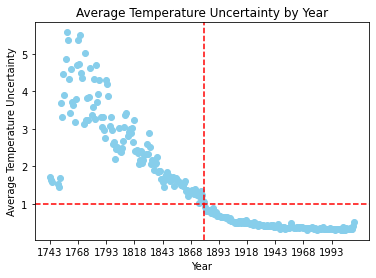

In [146]:
average_uncertainty_by_year = df3.groupby('Year')['AverageTemperatureUncertainty'].mean()

# Plot the results
plt.scatter(average_uncertainty_by_year.index, average_uncertainty_by_year.values, color='skyblue')
plt.title('Average Temperature Uncertainty by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature Uncertainty')
plt.xticks(range(min(df3['Year']), max(df3['Year'])+1, 25))
plt.axhline(y=1, color='red', linestyle='--', label='y = 1')
plt.axvline(x=1880, color='red', linestyle='--', label='x = 1')
plt.show()

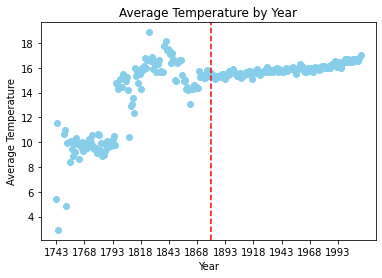

In [145]:
average_uncertainty_by_year = df3.groupby('Year')['AverageTemperature'].mean()

# Plot the results
plt.scatter(average_uncertainty_by_year.index, average_uncertainty_by_year.values, color='skyblue')
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.xticks(range(min(df3['Year']), max(df3['Year'])+1, 25))
plt.axvline(x=1880, color='red', linestyle='--', label='x = 1')
plt.show()

In [151]:
df4 = df3[df3['Year'] > 1879]

In [152]:
df4

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
35665,1880-01-01,10.418,1.054,Cairo,Egypt,29.74N,31.38E,1880
35666,1880-02-01,13.988,0.713,Cairo,Egypt,29.74N,31.38E,1880
35667,1880-03-01,15.382,1.018,Cairo,Egypt,29.74N,31.38E,1880
35668,1880-04-01,21.037,1.491,Cairo,Egypt,29.74N,31.38E,1880
35669,1880-05-01,24.740,0.844,Cairo,Egypt,29.74N,31.38E,1880
...,...,...,...,...,...,...,...,...
229684,2013-04-01,11.310,0.493,Tokyo,Japan,36.17N,139.23E,2013
229685,2013-05-01,16.757,0.396,Tokyo,Japan,36.17N,139.23E,2013
229686,2013-06-01,20.927,0.489,Tokyo,Japan,36.17N,139.23E,2013
229687,2013-07-01,24.645,0.404,Tokyo,Japan,36.17N,139.23E,2013


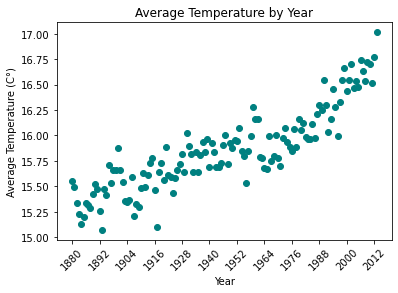

In [165]:
average_uncertainty_by_year = df4.groupby('Year')['AverageTemperature'].mean()

# Plot the results
plt.scatter(average_uncertainty_by_year.index, average_uncertainty_by_year.values, color='#008080')
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (C°)')
plt.xticks(range(min(df4['Year']), max(df4['Year'])+1, 12))
plt.xticks(rotation=45)
plt.show()